## Marciniak, Duncan, and Hu (2002): _Mechanics of Sheet Metal Forming_.
### Exercise 3.2.

Consider the case of (a) constant thickness, (b) uniaxial tension, and (c) plane strain, where $\sigma_1>\sigma_2$ and $\sigma_3=0$. For each case, compare the ratio of the effective stress to the maximum shear stress ($\overline\sigma/\tau_{\max}$).

### Solutions

Stress ratio $\alpha=\sigma_2/\sigma_1$ for:

(a) Constant thickness:
$$
\varepsilon_3=0 \qquad\rightarrow\qquad
\varepsilon_2=-\varepsilon_1 \qquad\rightarrow\qquad
\beta=\frac{\varepsilon_2}{\varepsilon_1} = -1 \qquad\rightarrow\qquad
\alpha=\frac{2\beta+1}{2+\beta}=-1
$$

(b) Uniaxial tension:
$$
\sigma_1 \neq 0 \qquad,\qquad
\sigma_2 = \sigma_3 = 0 \qquad\rightarrow\qquad
\alpha = 0
$$

(c) Plane strain:
$$
\varepsilon_2=0 \qquad\rightarrow\qquad
\beta = 0 \qquad\rightarrow\qquad
\alpha = 1/2
$$

The effective stress is then calculated from:
$$
\overline\sigma = \sigma_1\sqrt{1-\alpha+\alpha^2}
$$
and the maximum shear stress from:
$$
\tau_{\max} = \frac{\sigma_{\max}-\sigma_{\min}}{2}
$$

(a) Constant thickness ($\alpha=-1$):
$$
\begin{aligned}
\overline\sigma = & \sigma_1\sqrt{1+1+1} = \sqrt{3}\sigma_1 \\
\tau_{\max} = & \frac{\sigma_1-\sigma_2}{2} = \sigma_1 \frac{1-\alpha}{2} = \sigma_1 \\
\frac{\overline\sigma}{\tau_{\max}} = & \sqrt{3}
\end{aligned}
$$

(b) Uniaxial tension ($\alpha=0$):
$$
\begin{aligned}
\overline\sigma = & \sigma_1 \\
\tau_{\max} = & \frac{\sigma_1-\sigma_2}{2} = \sigma_1/2 \\
\frac{\overline\sigma}{\tau_{\max}} = & 2
\end{aligned}
$$

(c) Plane strain ($\alpha=1/2$):
$$
\begin{aligned}
\overline\sigma = & \sigma_1\sqrt{1-\frac{1}{2}+\frac{1}{4}} = \frac{\sqrt{3}}{2}\sigma_1 \\
\tau_{\max} = & \frac{\sigma_1-\sigma_3}{2} = \frac{\sigma_1}{2} \\
\frac{\overline\sigma}{\tau_{\max}} = & \sqrt{3}
\end{aligned}
$$

Notice that $\sigma_{\max}=\sigma_1$ in all cases, $\sigma_{\min}=\sigma_2$ in (a,b) and $\sigma_{\min}=\sigma_3$ in (c).

### Example with Python

It is useful to plot the stress and strain paths along with the Mohr circles to determine the maximum and minimum stresses.

### Stress paths

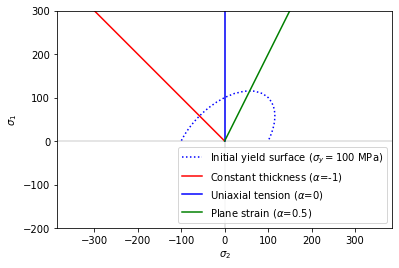

In [1]:
a1 = -1
a2 = 0
a3 = 1/2

import math
sy = 100 # let's assume this yield stress
s1f = 300
s1 = lambda a: sy/(math.sqrt(1-a+a**2))

# initial yield surface
a = [200*i/1000-100 for i in range(1000)]
y0 = [s1(i) for i in a]
x0 = [j*i for i,j in zip(y0,a)]

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.axvline(x=0, color='k', linewidth=0.2)
ax.axhline(y=0, color='k', linewidth=0.2)
ax.plot(x0,y0, 'b:', label=r'Initial yield surface ($\sigma_y=%s$ MPa)' % sy)
ax.plot([0, a1*s1f], [0, s1f], color='r', label=r'Constant thickness ($\alpha$=%s)' % a1)
ax.plot([0, a2*s1f], [0, s1f], color='b', label=r'Uniaxial tension ($\alpha$=%s)' % a2)
ax.plot([0, a3*s1f], [0, s1f], color='g', label=r'Plane strain ($\alpha$=%s)' % a3)
ax.axis([-200, 200, -200, 300])
ax.set_xlabel(r'$\sigma_2$')
ax.set_ylabel(r'$\sigma_1$')
plt.legend(loc='lower right')
ax.set_aspect('equal', adjustable='datalim')
plt.show()

### Strain paths

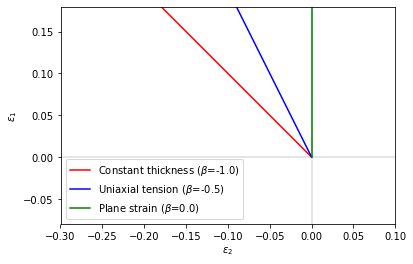

In [2]:
beta = lambda a: (2*a-1)/(2-a)
b1 = beta(a1)
b2 = beta(a2)
b3 = beta(a3)

e1f = 0.2

fig, ax = plt.subplots()
ax.axvline(x=0, color='k', linewidth=0.2)
ax.axhline(y=0, color='k', linewidth=0.2)
ax.plot([0, b1*e1f], [0, e1f], color='r', label=r'Constant thickness ($\beta$=%0.1f)' % b1)
ax.plot([0, b2*e1f], [0, e1f], color='b', label=r'Uniaxial tension ($\beta$=%0.1f)' % b2)
ax.plot([0, b3*e1f], [0, e1f], color='g', label=r'Plane strain ($\beta$=%0.1f)' % b3)
ax.axis([-0.3, 0.1, -0.1, 0.2])
ax.set_xlabel(r'$\varepsilon_2$')
ax.set_ylabel(r'$\varepsilon_1$')
plt.legend(loc='lower left')
ax.set_aspect('equal', adjustable='datalim')
plt.show()


### Mohr circles

(a) Constant thickness


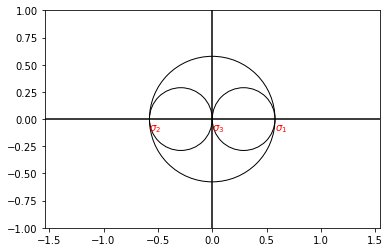

In [3]:
import matplotlib.pyplot as plt

s1 = 1/math.sqrt(3)
s2 = -1*s1
s3 = 0
print('(a) Constant thickness')
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
circle1 = plt.Circle(((s1+s2)/2, 0), abs(s1-s2)/2, fill=False)
circle2 = plt.Circle(((s2+s3)/2, 0), abs(s2-s3)/2, fill=False)
circle3 = plt.Circle(((s3+s1)/2, 0), abs(s3-s1)/2, fill=False)
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.annotate(r'$\sigma_1$', [s1,-0.1], color='r')
ax.annotate(r'$\sigma_2$', [s2,-0.1], color='r')
ax.annotate(r'$\sigma_3$', [s3,-0.1], color='r')
ax.set_ylim(-1,1)
ax.set_aspect('equal', adjustable='datalim')
ax.plot()
plt.show()

(b) Uniaxial tension


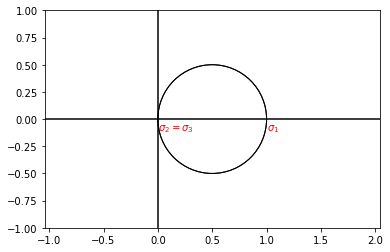

In [4]:
s1 = 1
s2 = 0
s3 = 0
print('(b) Uniaxial tension')
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
circle1 = plt.Circle(((s1+s2)/2, 0), abs(s1-s2)/2, fill=False)
circle2 = plt.Circle(((s2+s3)/2, 0), abs(s2-s3)/2, fill=False)
circle3 = plt.Circle(((s3+s1)/2, 0), abs(s3-s1)/2, fill=False)
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.annotate(r'$\sigma_1$', [s1,-0.1], color='r')
ax.annotate(r'$\sigma_2=\sigma_3$', [s2,-0.1], color='r')
ax.set_ylim(-1,1)
ax.set_aspect('equal', adjustable='datalim')
ax.plot()
plt.show()

(c) Plane strain


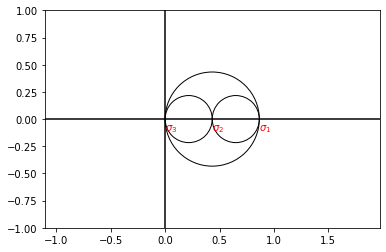

In [5]:
s1 = math.sqrt(3)/2
s2 = s1/2
s3 = 0
print('(c) Plane strain')
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
circle1 = plt.Circle(((s1+s2)/2, 0), abs(s1-s2)/2, fill=False)
circle2 = plt.Circle(((s2+s3)/2, 0), abs(s2-s3)/2, fill=False)
circle3 = plt.Circle(((s3+s1)/2, 0), abs(s3-s1)/2, fill=False)
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.annotate(r'$\sigma_1$', [s1,-0.1], color='r')
ax.annotate(r'$\sigma_2$', [s2,-0.1], color='r')
ax.annotate(r'$\sigma_3$', [s3,-0.1], color='r')
ax.set_ylim(-1,1)
ax.set_aspect('equal', adjustable='datalim')
ax.plot()
plt.show()